In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

In [3]:
from dgym.envs.designer import Designer, Generator

designer = Designer(
    Generator(building_blocks, fingerprints),
    reactions,
    cache = True
)

In [53]:
r = deck[0].reactants[0]
generator = designer.generator(r)

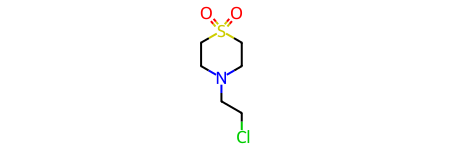

In [96]:
next(generator)

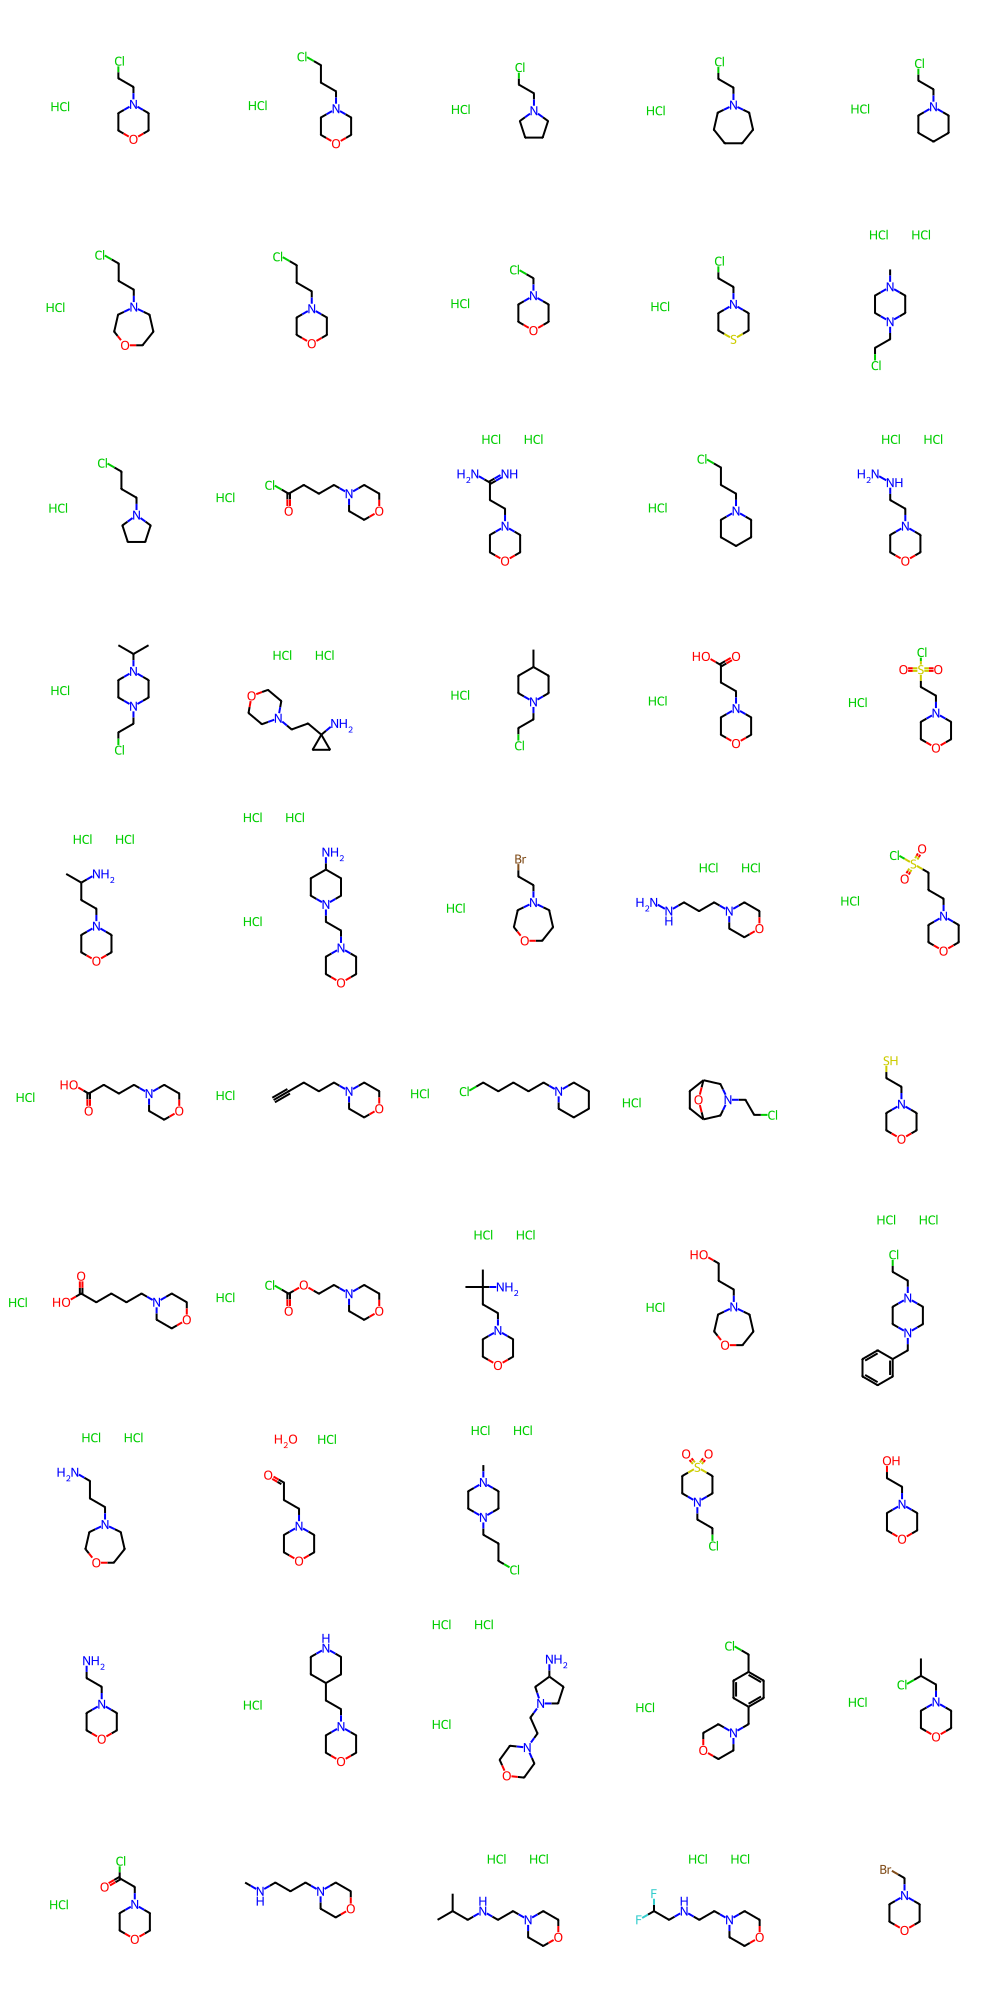

In [117]:
import torch

molecules = [deck[0].reactants[0]]

# Identify analogs of each original molecule
indices, scores, sizes = designer.generator.fingerprint_similarity(molecules)

# Add size similarity to score
# scores += designer.generator.size_similarity(molecules, sizes)
samples_idx = torch.argsort(scores, descending=True)
samples = torch.gather(indices, 1, samples_idx).tolist()
bbs = [designer.generator.building_blocks[s] for s in samples[0][:50]]

from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage(bbs, molsPerRow=5)

In [124]:
for index in indices[0].tolist():
    mol = designer.generator.building_blocks[index]
    if mol.HasSubstructMatch(molecules[0]):
        print(mol)

ArgumentError: Python argument types in
    Mol.HasSubstructMatch(Mol, Molecule)
did not match C++ signature:
    HasSubstructMatch(RDKit::ROMol self, RDKit::MolBundle query, RDKit::SubstructMatchParameters params=True)
    HasSubstructMatch(RDKit::ROMol self, RDKit::ROMol query, RDKit::SubstructMatchParameters params)
    HasSubstructMatch(RDKit::ROMol self, RDKit::MolBundle query, bool recursionPossible=True, bool useChirality=False, bool useQueryQueryMatches=False)
    HasSubstructMatch(RDKit::ROMol self, RDKit::ROMol query, bool recursionPossible=True, bool useChirality=False, bool useQueryQueryMatches=False)

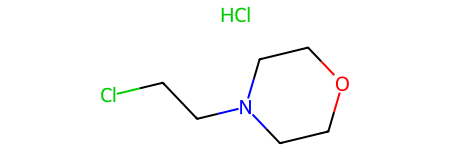

In [126]:
molecules[0]